<h1 class='font-effect-3d' style='font-family:Smokum; color:#ff355e;'>Code Modules & Styles</h1>

In [1]:
library(IRdisplay)
library(repr); library(stringr)
library(tensorflow); library(keras)
library(imager); library(R6)

Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:stringr’:

    boundary


The following object is masked from ‘package:IRdisplay’:

    display


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Smokum|Roboto&effect=3d'); 
a,h4 {color:slategray; font-family:Roboto; text-shadow:3px 3px 3px #bbb;}
span {color:black; font-family:Roboto; text-shadow:3px 3px 3px #bbb;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#ff355e;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}     
</style>")

<h1 class='font-effect-3d' style='font-family:Smokum; color:#ff355e;'>Data Exploration</h1>

In [3]:
fpath<-"../input/art-pictogram/pictogram/"
manners<-c('pictogram','contour','sketch')
objects<-c('flower','bird','butterfly','tree',
           'airplane','crane','dog','horse',
           'deer','truck','car','cat',
           'frog','ship','fish','house')
pics<-list.files(fpath)
fl<-length(pics)
pics<-data.frame(c(1:fl),pics)
colnames(pics)<-c('number','file')
pics$file<-c(array_reshape(as.matrix(pics['file']),fl))
labels1<-as.integer(str_extract(pics$file,'[0-9][0-9]'))-1
labels2<-as.integer(str_extract(pics$file,'[0-9][0-9][0-9]'))-1
pics$label1<-labels1
pics$manner<-c(array_reshape(as.matrix(manners[labels1+1]),fl))
pics$label2<-labels2
pics$object<-c(array_reshape(as.matrix(objects[labels2+1]),fl))
str(pics)

'data.frame':	2794 obs. of  6 variables:
 $ number: int  1 2 3 4 5 6 7 8 9 10 ...
 $ file  : chr  "01_001_00001.png" "01_001_00002.png" "01_001_00003.png" "01_001_00004.png" ...
 $ label1: num  0 0 0 0 0 0 0 0 0 0 ...
 $ manner: chr  "pictogram" "pictogram" "pictogram" "pictogram" ...
 $ label2: num  0 0 0 0 0 0 0 0 0 0 ...
 $ object: chr  "flower" "flower" "flower" "flower" ...


In [4]:
tail(pics,20)

,number,file,label1,manner,label2,object
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>
2775,2775,03_013_00002.png,2,sketch,12,frog
2776,2776,03_014_00001.png,2,sketch,13,ship
2777,2777,03_014_00002.png,2,sketch,13,ship
2778,2778,03_014_00003.png,2,sketch,13,ship
2779,2779,03_014_00004.png,2,sketch,13,ship
2780,2780,03_014_00005.png,2,sketch,13,ship
2781,2781,03_016_00001.png,2,sketch,15,house
2782,2782,03_016_00002.png,2,sketch,15,house
2783,2783,03_016_00003.png,2,sketch,15,house


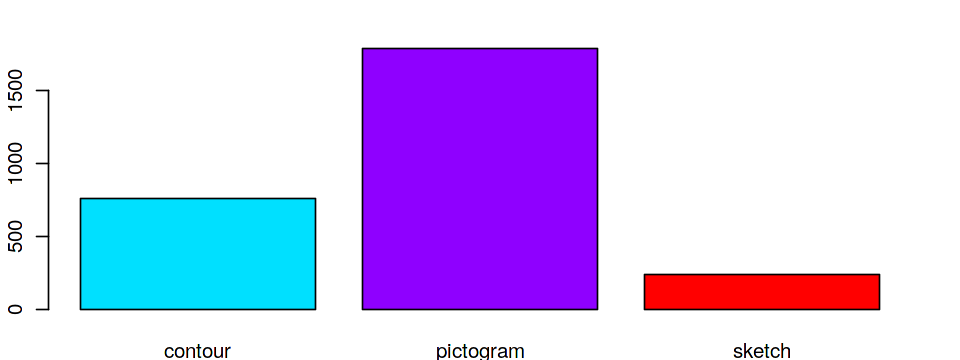

In [5]:
options(repr.plot.width=8,repr.plot.height=3)
par(mar=c(2,2,2,2))
pics$manner %>% 
    table() %>% barplot(col=rainbow(3,start=.52,end=1))

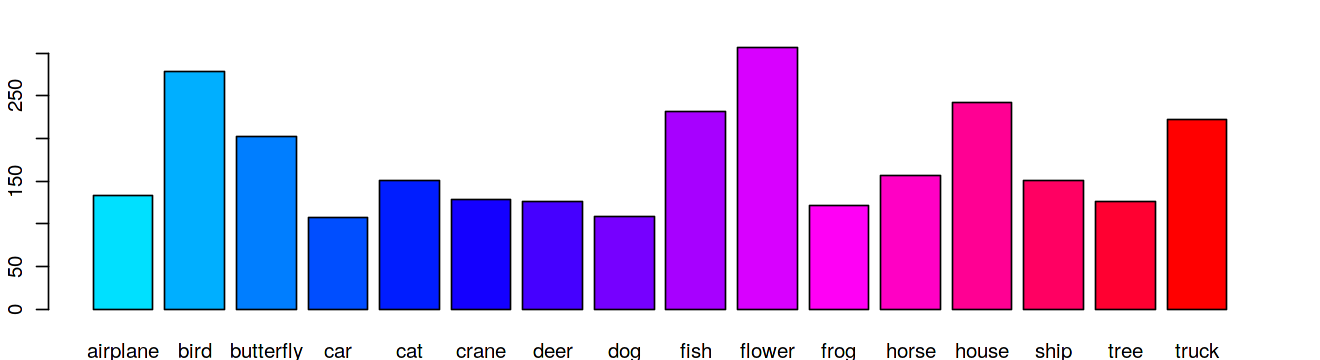

In [6]:
options(repr.plot.width=11,repr.plot.height=3)
par(mar=c(2,2,2,2))
pics$object %>% 
    table() %>% barplot(col=rainbow(16,start=.52,end=1))

[1]  1 64 64  3

[1] 64 64  1  4

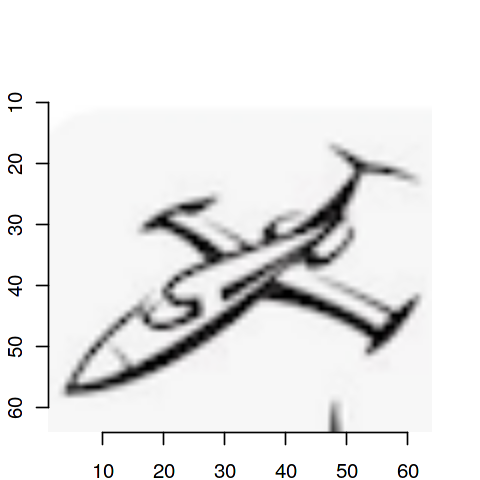

In [7]:
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
img_path<-paste0(fpath,pics$file[[500]])
img<-keras::image_load(img_path,target_size=c(64,64))
img<-image_to_array(img)/255
img<-array_reshape(img,c(1,64,64,3)); dim(img)
im<-load.image(img_path); dim(im); plot(im)

[1]  1 64 64  1

[1] 64 64  1  4

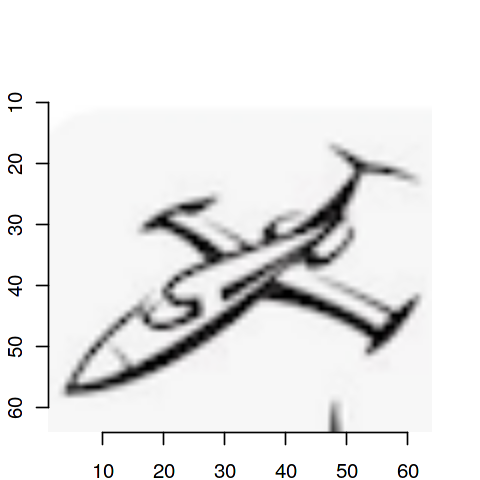

In [8]:
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
img<-keras::image_load(img_path,target_size=c(64,64),
                       grayscale=TRUE)
img<-image_to_array(img)
img<-array_reshape(img,c(1,64,64,1)); dim(img)
im<-load.image(img_path); dim(im); plot(im)

<h1 class='font-effect-3d' style='font-family:Smokum; color:#ff355e;'>Data Processing</h1>

In [9]:
labels1<-keras::to_categorical(labels1,3)
labels2<-keras::to_categorical(labels2,16)
print(labels1[1,]); print(labels2[1,])

[1] 1 0 0
 [1] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [10]:
image_paths<-list.files(fpath,recursive=TRUE,full.names=TRUE)
image_paths<-image_paths[1:length(image_paths)]
image_paths[3:4]

[1] "../input/art-pictogram/pictogram//01_001_00003.png"
[2] "../input/art-pictogram/pictogram//01_001_00004.png"

In [11]:
image_loading<-function(image_path) {
    image<-keras::image_load(image_path,grayscale=TRUE,
                             target_size=c(64,64))
    image<-image_to_array(image)/255
    image<-array_reshape(image,c(1,dim(image)))
    return(image) }

In [12]:
images<-lapply(image_paths,image_loading)
images<-array_reshape(images,c(-1,64,64,1))
c(dim(images),dim(labels1),dim(labels2))

[1] 2794   64   64    1 2794    3 2794   16

In [13]:
dd<-c(-1,64*64); indices<-sample(1:fl)
train_indices<-indices[1:round(.7*fl)]
valid_indices<-indices[(round(.7*fl)+1):round(.85*fl)]
test_indices<-indices[(round(.85*fl)+1):fl]
images<-array_reshape(images,dd)
x_train<-images[train_indices,]
x_train<-array_reshape(x_train,c(-1,64,64,1))
y_train<-labels1[train_indices,]
x_valid<-images[valid_indices,]
x_valid<-array_reshape(x_valid,c(-1,64,64,1))
y_valid<-labels1[valid_indices,]
x_test<-images[test_indices,]
x_test<-array_reshape(x_test,c(-1,64,64,1))
y_test<-labels1[test_indices,]
c(dim(x_train),dim(x_valid),dim(x_test),
  dim(y_train),dim(y_valid),dim(y_test))

[1] 1956   64   64    1  419   64   64    1  419   64   64    1 1956    3  419
[16]    3  419    3

[1] "pictogram"


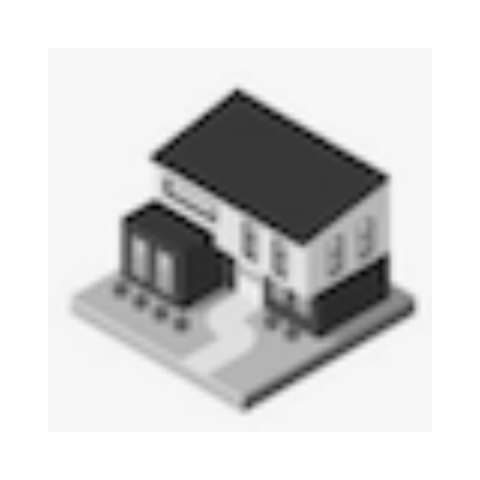

In [14]:
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
rn<-sample(1:50,1)
imgs<-array_reshape(x_train,c(-1,64,64))
plot(as.raster(imgs[rn,1:64,1:64]))
l2<-which(y_train[rn,1:3]==1)
print(manners[l2])

<h1 class='font-effect-3d' style='font-family:Smokum; color:#ff355e;'>Manner Classification</h1>

In [15]:
mlp_model<-keras_model_sequential()
mlp_model %>%  
layer_dense(64,input_shape=c(64*64)) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%  
layer_dense(128) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(256) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%
layer_dense(512) %>%  
layer_activation("relu") %>%  
layer_dropout(.2) %>% 
layer_dense(3) %>%    
layer_activation("softmax")
mlp_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="adam",metrics="accuracy")
summary(mlp_model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 64)                      262208      
________________________________________________________________________________
activation (Activation)             (None, 64)                      0           
________________________________________________________________________________
batch_normalization (BatchNormaliza (None, 64)                      256         
________________________________________________________________________________
dense_1 (Dense)                     (None, 128)                     8320        
________________________________________________________________________________
activation_1 (Activation)           (None, 128)                     0           
________________________________________________________________________________
batch_no

In [16]:
cb<-list(callback_model_checkpoint("mlp_best_weights.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75)) 
mlp_fit<-mlp_model %>%
    fit(x=array_reshape(x_train,dd),y=y_train,
        shuffle=T,batch_size=64,epochs=100,callbacks=cb,
        validation_data=list(array_reshape(x_valid,dd),y_valid))

`geom_smooth()` using formula 'y ~ x'



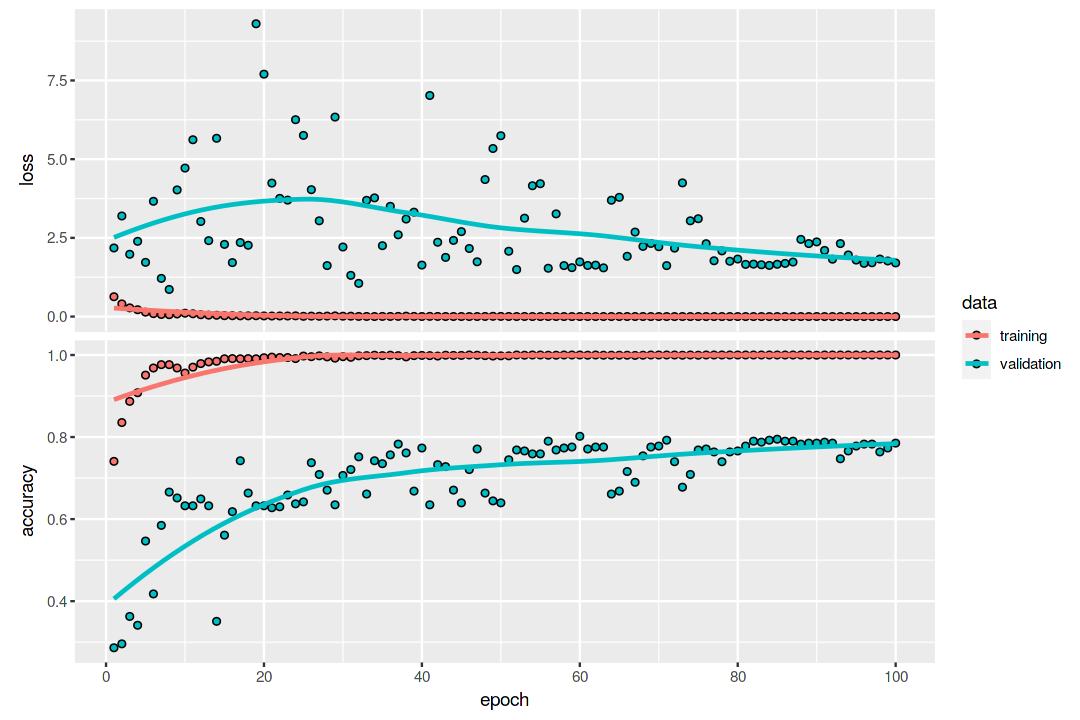

In [17]:
options(repr.plot.width=9,repr.plot.height=6)
plot(mlp_fit)

In [18]:
mlp_fit_df<-as.data.frame(mlp_fit)
mlp_fit_df[281:300,]

,epoch,value,metric,data
,<int>,<dbl>,<fct>,<fct>
281,81,1.658015,loss,validation
282,82,1.665918,loss,validation
283,83,1.645606,loss,validation
284,84,1.625341,loss,validation
285,85,1.660899,loss,validation
286,86,1.689010,loss,validation
287,87,1.731693,loss,validation
288,88,2.451913,loss,validation
289,89,2.318890,loss,validation


In [19]:
load_model_weights_hdf5(mlp_model,"mlp_best_weights.h5")
mlp_model %>% 
    evaluate(array_reshape(x_test,dd),y_test)

$loss
[1] 0.8756538

$accuracy
[1] 0.673031

In [20]:
cnn_model<-keras_model_sequential()
cnn_model %>%  
layer_conv_2d(filter=32,kernel_size=c(5,5),
              padding="same",
              input_shape=c(64,64,1)) %>%  
layer_activation("relu") %>%  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_conv_2d(filter=196,kernel_size=c(5,5),
              padding="same") %>% 
layer_activation("relu") %>%
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(.25) %>%
layer_global_average_pooling_2d() %>%  
layer_dense(1024) %>%  
layer_activation("tanh") %>%  
layer_dropout(.25) %>%  
layer_dense(64) %>%  
layer_activation("tanh") %>%  
layer_dropout(.25) %>%
layer_dense(3) %>%    
layer_activation("softmax")
cnn_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="nadam",metrics="accuracy")
summary(cnn_model)

Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d (Conv2D)                     (None, 64, 64, 32)              832         
________________________________________________________________________________
activation_5 (Activation)           (None, 64, 64, 32)              0           
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 32, 32, 32)              0           
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 32, 32, 32)              0           
________________________________________________________________________________
conv2d_1 (Conv2D)                   (None, 32, 32, 196)             156996      
________________________________________________________________________________
activa

In [21]:
cb<-list(callback_model_checkpoint("cnn_best_weights.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75))        
cnn_fit<-cnn_model %>%
    fit(x=x_train,y=y_train,shuffle=T,batch_size=16,epochs=100,
        validation_data=list(x_valid,y_valid),callbacks=cb)

`geom_smooth()` using formula 'y ~ x'



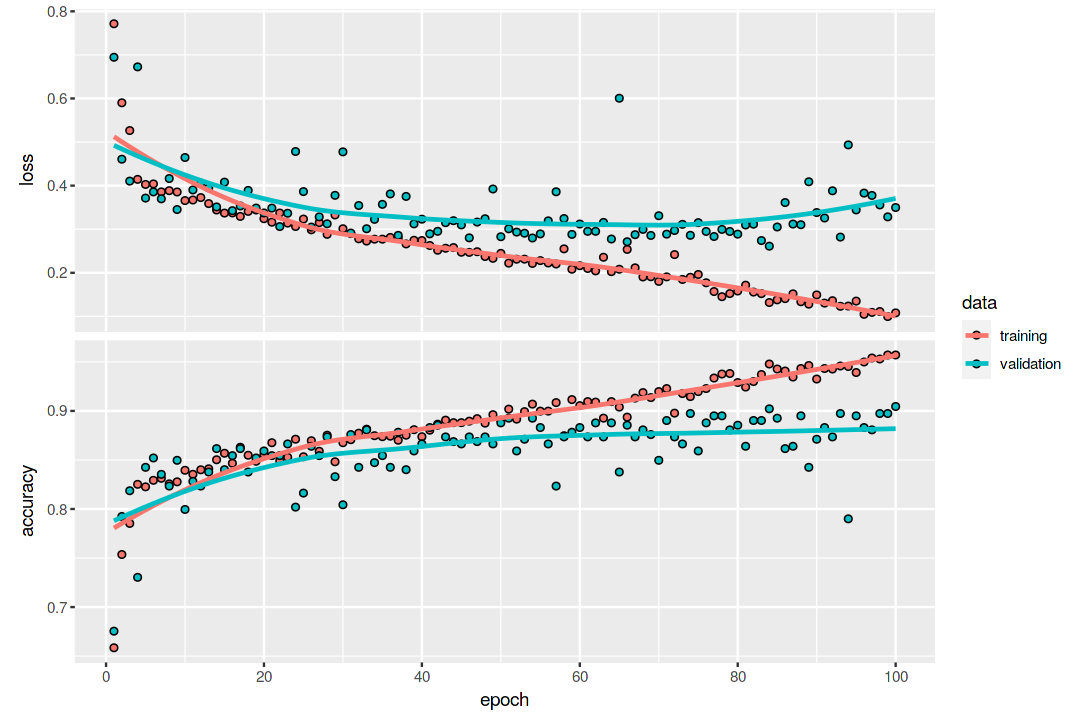

In [22]:
options(repr.plot.width=9,repr.plot.height=6)
plot(cnn_fit)

In [23]:
cnn_fit_df<-as.data.frame(cnn_fit)
cnn_fit_df[281:300,1:4]

,epoch,value,metric,data
,<int>,<dbl>,<fct>,<fct>
281,81,0.3096474,loss,validation
282,82,0.3114724,loss,validation
283,83,0.2739519,loss,validation
284,84,0.2610684,loss,validation
285,85,0.3050894,loss,validation
286,86,0.3611574,loss,validation
287,87,0.3118124,loss,validation
288,88,0.3102973,loss,validation
289,89,0.4088694,loss,validation


In [24]:
load_model_weights_hdf5(cnn_model,"cnn_best_weights.h5")
cnn_model %>% evaluate(x_test,y_test)

$loss
[1] 0.3519233

$accuracy
[1] 0.875895

In [25]:
rnn_model<-keras_model_sequential()
rnn_model %>%  
layer_lstm(196,return_sequences=T,
           input_shape=c(1,64*64)) %>%  
layer_lstm(196,return_sequences=T) %>%
layer_lstm(196) %>%
layer_dense(512) %>%  
layer_activation("relu") %>%
layer_dense(3) %>%    
layer_activation("softmax")
rnn_model %>%
    compile(loss="categorical_crossentropy",
            optimizer="adam",metrics="accuracy")
summary(rnn_model)

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
lstm (LSTM)                         (None, 1, 196)                  3365712     
________________________________________________________________________________
lstm_1 (LSTM)                       (None, 1, 196)                  308112      
________________________________________________________________________________
lstm_2 (LSTM)                       (None, 196)                     308112      
________________________________________________________________________________
dense_8 (Dense)                     (None, 512)                     100864      
________________________________________________________________________________
activation_10 (Activation)          (None, 512)                     0           
________________________________________________________________________________
dense_

In [26]:
cb<-list(callback_model_checkpoint("rnn_best_weights.h5",
                                   save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",
                                       factor=.75))
dd2<-c(-1,1,64*64)
rnn_fit<-rnn_model %>%
    fit(x=array_reshape(x_train,dd2),y=y_train,
        shuffle=T,batch_size=16,epochs=100,callbacks=cb,
        validation_data=list(array_reshape(x_valid,dd2),y_valid))

`geom_smooth()` using formula 'y ~ x'



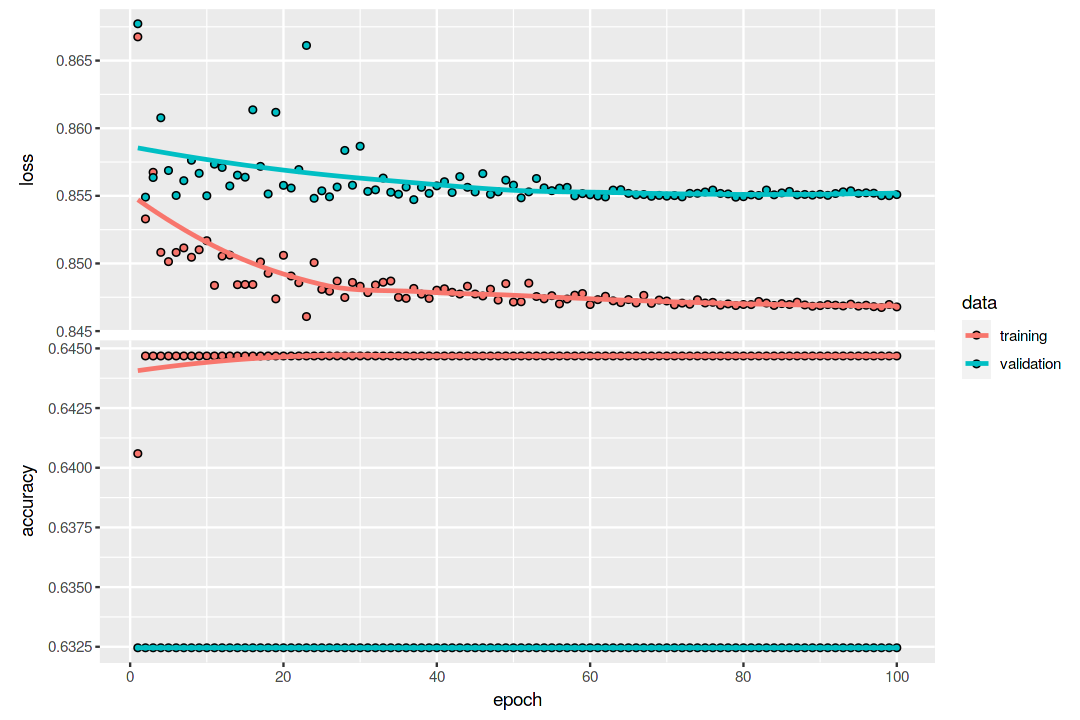

In [27]:
options(repr.plot.width=9,repr.plot.height=6)
plot(rnn_fit)

In [28]:
rnn_fit_df<-as.data.frame(rnn_fit)
rnn_fit_df[281:300,1:4]

,epoch,value,metric,data
,<int>,<dbl>,<fct>,<fct>
281,81,0.8550719,loss,validation
282,82,0.8550236,loss,validation
283,83,0.8554294,loss,validation
284,84,0.8550750,loss,validation
285,85,0.8552174,loss,validation
286,86,0.8553276,loss,validation
287,87,0.8550688,loss,validation
288,88,0.8551030,loss,validation
289,89,0.8550521,loss,validation


In [29]:
load_model_weights_hdf5(rnn_model,"rnn_best_weights.h5")
rnn_model %>% evaluate(array_reshape(x_test,dd2),y_test)

$loss
[1] 0.8619992

$accuracy
[1] 0.6372315